<a href="https://colab.research.google.com/github/MAboElFottouh/AMIT/blob/main/bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [4]:
data = pd.read_csv("/content/drive/MyDrive/bank-full.csv", sep=";")

In [5]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Drop 'duration' column
data.drop('duration',axis=1, inplace= True)

In [7]:
#replace unknown to nan
data.replace('unknown',np.nan,inplace=True)

In [8]:
# Drop 'poutcome'  have many nan
data.drop('poutcome',axis=1, inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [10]:
data.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
campaign         0
pdays            0
previous         0
y                0
dtype: int64

In [11]:
#replace nan to mode
data.replace(np.nan,data['job'].mode()[0],inplace=True)
data.replace(np.nan,data['education'].mode()[0],inplace=True)
data.replace(np.nan,data['contact'].mode()[0],inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()


In [13]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["job"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["job"+str(int(i)) for i in range(data['job'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['job'], axis=1) 
#printing to verify 
print(data.head())

   age  marital    education default  balance housing loan      contact  day  \
0   58  married     tertiary      no     2143     yes   no  blue-collar    5   
1   44   single    secondary      no       29     yes   no  blue-collar    5   
2   33  married    secondary      no        2     yes  yes  blue-collar    5   
3   47  married  blue-collar      no     1506     yes   no  blue-collar    5   
4   33   single  blue-collar      no        1      no   no  blue-collar    5   

  month  ...  job1  job2  job3 job4  job5  job6  job7  job8  job9  job10  
0   may  ...   0.0   0.0   0.0  1.0   0.0   0.0   0.0   0.0   0.0    0.0  
1   may  ...   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   1.0    0.0  
2   may  ...   0.0   1.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0    0.0  
3   may  ...   1.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0    0.0  
4   may  ...   1.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0    0.0  

[5 rows x 25 columns]


In [14]:
def random(row):
  return row.mean()

In [15]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["marital"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["marital"+str(int(i)) for i in range(data['marital'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['marital'], axis=1) 
#printing to verify 
print(data.head())

   age    education default  balance housing loan      contact  day month  \
0   58     tertiary      no     2143     yes   no  blue-collar    5   may   
1   44    secondary      no       29     yes   no  blue-collar    5   may   
2   33    secondary      no        2     yes  yes  blue-collar    5   may   
3   47  blue-collar      no     1506     yes   no  blue-collar    5   may   
4   33  blue-collar      no        1      no   no  blue-collar    5   may   

   campaign  ...  job4  job5 job6  job7  job8  job9  job10  marital0  \
0         1  ...   1.0   0.0  0.0   0.0   0.0   0.0    0.0       0.0   
1         1  ...   0.0   0.0  0.0   0.0   0.0   1.0    0.0       0.0   
2         1  ...   0.0   0.0  0.0   0.0   0.0   0.0    0.0       0.0   
3         1  ...   0.0   0.0  0.0   0.0   0.0   0.0    0.0       0.0   
4         1  ...   0.0   0.0  0.0   0.0   0.0   0.0    0.0       0.0   

   marital1  marital2  
0       1.0       0.0  
1       0.0       1.0  
2       1.0       0.0  
3       

In [16]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["education"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["education"+str(int(i)) for i in range(data['education'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['education'], axis=1) 
#printing to verify 
print(data.head())

   age default  balance housing loan      contact  day month  campaign  pdays  \
0   58      no     2143     yes   no  blue-collar    5   may         1     -1   
1   44      no       29     yes   no  blue-collar    5   may         1     -1   
2   33      no        2     yes  yes  blue-collar    5   may         1     -1   
3   47      no     1506     yes   no  blue-collar    5   may         1     -1   
4   33      no        1      no   no  blue-collar    5   may         1     -1   

   ...  job8 job9  job10  marital0  marital1  marital2  education0  \
0  ...   0.0  0.0    0.0       0.0       1.0       0.0         0.0   
1  ...   0.0  1.0    0.0       0.0       0.0       1.0         0.0   
2  ...   0.0  0.0    0.0       0.0       1.0       0.0         0.0   
3  ...   0.0  0.0    0.0       0.0       1.0       0.0         1.0   
4  ...   0.0  0.0    0.0       0.0       0.0       1.0         1.0   

   education1  education2  education3  
0         0.0         0.0         1.0  
1         0.

In [17]:
print(data['default'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["default"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["default"+str(int(i)) for i in range(data['default'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['default'], axis=1) 
#printing to verify 
print(data.head())

2
   age  balance housing loan      contact  day month  campaign  pdays  \
0   58     2143     yes   no  blue-collar    5   may         1     -1   
1   44       29     yes   no  blue-collar    5   may         1     -1   
2   33        2     yes  yes  blue-collar    5   may         1     -1   
3   47     1506     yes   no  blue-collar    5   may         1     -1   
4   33        1      no   no  blue-collar    5   may         1     -1   

   previous  ... job10  marital0  marital1  marital2  education0  education1  \
0         0  ...   0.0       0.0       1.0       0.0         0.0         0.0   
1         0  ...   0.0       0.0       0.0       1.0         0.0         0.0   
2         0  ...   0.0       0.0       1.0       0.0         0.0         0.0   
3         0  ...   0.0       0.0       1.0       0.0         1.0         0.0   
4         0  ...   0.0       0.0       0.0       1.0         1.0         0.0   

   education2  education3  default0  default1  
0         0.0         1.0     

In [18]:
print(data['housing'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["housing"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["housing"+str(int(i)) for i in range(data['housing'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['housing'], axis=1) 
#printing to verify 
print(data.head())

2
   age  balance loan      contact  day month  campaign  pdays  previous   y  \
0   58     2143   no  blue-collar    5   may         1     -1         0  no   
1   44       29   no  blue-collar    5   may         1     -1         0  no   
2   33        2  yes  blue-collar    5   may         1     -1         0  no   
3   47     1506   no  blue-collar    5   may         1     -1         0  no   
4   33        1   no  blue-collar    5   may         1     -1         0  no   

   ...  marital1  marital2  education0  education1  education2  education3  \
0  ...       1.0       0.0         0.0         0.0         0.0         1.0   
1  ...       0.0       1.0         0.0         0.0         1.0         0.0   
2  ...       1.0       0.0         0.0         0.0         1.0         0.0   
3  ...       1.0       0.0         1.0         0.0         0.0         0.0   
4  ...       0.0       1.0         1.0         0.0         0.0         0.0   

   default0  default1  housing0  housing1  
0       1.

In [19]:
print(data['loan'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["loan"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["loan"+str(int(i)) for i in range(data['loan'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['loan'], axis=1) 
#printing to verify 
print(data.head())

2
   age  balance      contact  day month  campaign  pdays  previous   y  job0  \
0   58     2143  blue-collar    5   may         1     -1         0  no   0.0   
1   44       29  blue-collar    5   may         1     -1         0  no   0.0   
2   33        2  blue-collar    5   may         1     -1         0  no   0.0   
3   47     1506  blue-collar    5   may         1     -1         0  no   0.0   
4   33        1  blue-collar    5   may         1     -1         0  no   0.0   

   ...  education0  education1  education2  education3  default0  default1  \
0  ...         0.0         0.0         0.0         1.0       1.0       0.0   
1  ...         0.0         0.0         1.0         0.0       1.0       0.0   
2  ...         0.0         0.0         1.0         0.0       1.0       0.0   
3  ...         1.0         0.0         0.0         0.0       1.0       0.0   
4  ...         1.0         0.0         0.0         0.0       1.0       0.0   

   housing0  housing1  loan0  loan1  
0       0.

In [20]:
print(data['contact'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["contact"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["contact"+str(int(i)) for i in range(data['contact'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['contact'], axis=1) 
#printing to verify 
print(data.head())

3
   age  balance  day month  campaign  pdays  previous   y  job0  job1  ...  \
0   58     2143    5   may         1     -1         0  no   0.0   0.0  ...   
1   44       29    5   may         1     -1         0  no   0.0   0.0  ...   
2   33        2    5   may         1     -1         0  no   0.0   0.0  ...   
3   47     1506    5   may         1     -1         0  no   0.0   1.0  ...   
4   33        1    5   may         1     -1         0  no   0.0   1.0  ...   

   education3  default0  default1  housing0  housing1  loan0  loan1  contact0  \
0         1.0       1.0       0.0       0.0       1.0    1.0    0.0       1.0   
1         0.0       1.0       0.0       0.0       1.0    1.0    0.0       1.0   
2         0.0       1.0       0.0       0.0       1.0    0.0    1.0       1.0   
3         0.0       1.0       0.0       0.0       1.0    1.0    0.0       1.0   
4         0.0       1.0       0.0       1.0       0.0    1.0    0.0       1.0   

   contact1  contact2  
0       0.0       

In [21]:
print(data['month'].nunique())
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(data["month"].values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["month"+str(int(i)) for i in range(data['month'].nunique())]) 
data = pd.concat([data, dfOneHot], axis=1)
#droping the country column 
data= data.drop(['month'], axis=1) 
#printing to verify 
print(data.head())

12
   age  balance  day  campaign  pdays  previous   y  job0  job1  job2  ...  \
0   58     2143    5         1     -1         0  no   0.0   0.0   0.0  ...   
1   44       29    5         1     -1         0  no   0.0   0.0   0.0  ...   
2   33        2    5         1     -1         0  no   0.0   0.0   1.0  ...   
3   47     1506    5         1     -1         0  no   0.0   1.0   0.0  ...   
4   33        1    5         1     -1         0  no   0.0   1.0   0.0  ...   

   month2  month3  month4  month5  month6  month7  month8  month9  month10  \
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0      0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0      0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0      0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0      0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0      0.0   

   month11  
0      0.0  
1      0.0  
2      0.0  
3      

In [22]:
data['y']=le.fit_transform(data['y'])


In [23]:
data

,age,balance,day,campaign,pdays,previous,y,job0,job1,job2,...,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11
0,58,2143,5,1,-1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,29,5,1,-1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,2,5,1,-1,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,1506,5,1,-1,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,1,5,1,-1,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,71,1729,17,2,-1,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,72,5715,17,5,184,3,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,57,668,17,4,-1,0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#encode diagnosis values

In [24]:
#data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
#data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
#data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
#ata.iloc[:,4]=le.fit_transform(data.iloc[:,4])
#ata.iloc[:,6]=le.fit_transform(data.iloc[:,6])
#data.iloc[:,7]=le.fit_transform(data.iloc[:,7])
#data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
#ata.iloc[:,10]=le.fit_transform(data.iloc[:,10])
#data.iloc[:,14]=le.fit_transform(data.iloc[:,14])


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45211 non-null  int64  
 1   balance     45211 non-null  int64  
 2   day         45211 non-null  int64  
 3   campaign    45211 non-null  int64  
 4   pdays       45211 non-null  int64  
 5   previous    45211 non-null  int64  
 6   y           45211 non-null  int64  
 7   job0        45211 non-null  float64
 8   job1        45211 non-null  float64
 9   job2        45211 non-null  float64
 10  job3        45211 non-null  float64
 11  job4        45211 non-null  float64
 12  job5        45211 non-null  float64
 13  job6        45211 non-null  float64
 14  job7        45211 non-null  float64
 15  job8        45211 non-null  float64
 16  job9        45211 non-null  float64
 17  job10       45211 non-null  float64
 18  marital0    45211 non-null  float64
 19  marital1    45211 non-nul



```
# This is formatted as code
```

#Check Balancing

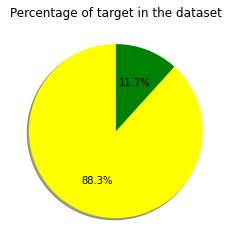

In [26]:
from matplotlib import pyplot as plt
sizes = data['y'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [27]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [28]:
data.describe()

,age,balance,day,campaign,pdays,previous,y,job0,job1,job2,...,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323,0.116985,0.114375,0.221627,0.032890,...,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441,0.321406,0.318269,0.415346,0.178351,...,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


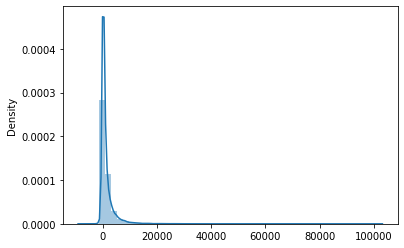

In [ ]:
sns.distplot(x=data['balance'])

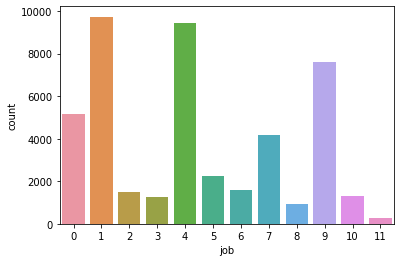

In [ ]:
sns.countplot(x='job',data=data)

# Feature Selection

#Correlation


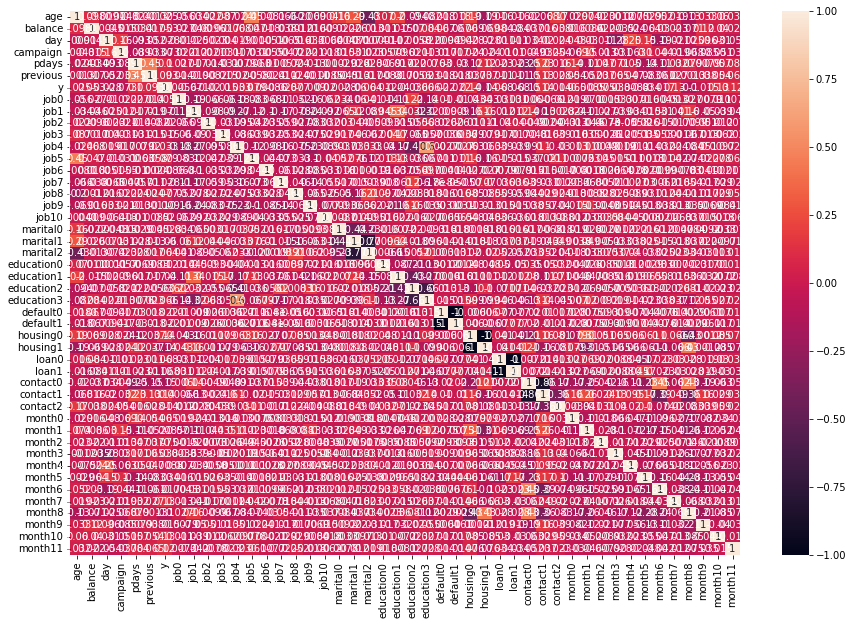

In [29]:
co=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=co,annot=True)

#Split Data

#over_sampling

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

#train_X,test_X,train_y,test_y = train_test_split(X,y)

In [ ]:

# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

In [49]:
from collections import Counter 
from imblearn.over_sampling import SMOTE
print("Before OverSampling count of labels : {} ".format(Counter(data.y.values)))
smote=SMOTE()

X_ov,y_ov=smote.fit_resample(X,y)
print("After OverSampling count of labels : {} ".format(Counter(y_ov)))


Before OverSampling count of labels : Counter({0: 39922, 1: 5289}) 
After OverSampling count of labels : Counter({0: 39922, 1: 39922}) 


In [50]:
train_X,test_X,train_y,test_y = train_test_split(X_ov,y_ov)

##grid search

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5]
}
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 17],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 11],
                         'min_samples_split': [2, 3, 5, 7, 9],
                         'random_state': [0, 1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=True)

In [ ]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(max_depth=17, max_features='log2', random_state=5)

## Model 

In [51]:
from sklearn.ensemble import RandomForestClassifier
models= RandomForestClassifier()
models.fit(train_X,train_y)

RandomForestClassifier()

In [54]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       min_samples_split=7, random_state=5)
                           #,max_features=6)
DT.fit(train_X,train_y)


DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       min_samples_split=7, random_state=5)

# Evalution 

In [55]:
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=DT.predict(train_X)


print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

Accuracy : 0.926940868025984
Recall :  0.8948460508701472
precsiion :  0.9559186300096528
F1 score : 0.9243746866951306


In [56]:
#On test Set 
y_pred=DT.predict(test_X)

print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

Accuracy : 0.9074194679625269
Recall :  0.8711412069308903
precsiion :  0.9404429155020426
F1 score : 0.9044665012406947


In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(train_X, train_y)
    
    # Prediction 
    predictions = models[key].predict(test_X)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, test_y)
    precision[key] = precision_score(predictions, test_y)
    recall[key] = recall_score(predictions, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.699865,0.712607,0.693858
Support Vector Machines,0.493863,0.180110,0.480182
Decision Trees,0.842092,0.860673,0.829188
Random Forest,0.898402,0.906881,0.891302
Naive Bayes,0.711688,0.899046,0.653285
K-Nearest Neighbor,0.815140,0.950176,0.747570


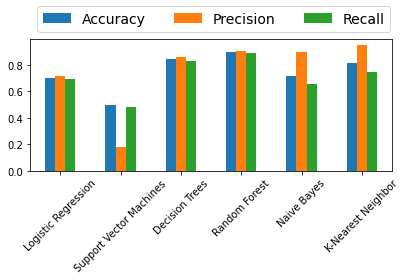

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()